# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
# Libraries
import pandas as pd
import numpy as np

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [2]:
# your code here
employees = pd.read_csv("employees.csv").drop("Unnamed: 0", axis=1)
employees.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [3]:
# Method 1
# your code here
employees.groupby(["Department"]).agg("mean").drop("Years", axis=1)

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [4]:
# Method 2
# your code here
employees.pivot_table(index=["Department"]).drop("Years", axis=1)

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [5]:
# your code here
employees.pivot_table(index=["Department", "Title"])["Salary"]

Department  Title    
HR          VP           70.0
            analyst      32.5
IT          VP           70.0
            analyst      32.5
            associate    60.0
Sales       associate    55.0
Name: Salary, dtype: float64

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [6]:
# your code here
employees.pivot_table(index=["Title"])

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [7]:
# your code here -  index title + divide per title type?
employees.pivot_table(index=["Title"], columns=["Title"])


Salary                    Years                  
Title         VP analyst  associate    VP analyst associate
Title                                                      
VP          70.0     NaN        NaN   8.0     NaN       NaN
analyst      NaN    32.5        NaN   NaN    2.25       NaN
associate    NaN     NaN  56.666667   NaN     NaN       4.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [8]:
# your code here 
# index departemetn and title + agg(median,min, max, stedev)
pivot_table1 = employees.pivot_table(values=["Salary"], index=["Department", "Title"], aggfunc=[np.median, np.min, np.max, np.std])
pivot_table1

median   amin   amax       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

In [9]:
"""
salaries in HR and IT are the same over all positions.
an it associate earns more than a sales assosiate. 
there is close to no variation in salaries across the field, the max change btw max and min is only of 5
we cannot say is people in HR earn more than those in Sales as we do not have equal positions to compare. 
the NaNs are not to be removed, they represent a stdev of 0 ans should therefore be filled, they just inofmr us there there is ot stdev
"""

'\nsalaries in HR and IT are the same over all positions.\nan it associate earns more than a sales assosiate. \nthere is close to no variation in salaries across the field, the max change btw max and min is only of 5\nwe cannot say is people in HR earn more than those in Sales as we do not have equal positions to compare. \nthe NaNs are not to be removed, they represent a stdev of 0 ans should therefore be filled, they just inofmr us there there is ot stdev\n'

#### Based on your comments, fill the missing values with an appropriate value.

In [10]:
# your code here
pivot_table1 = pivot_table1.fillna(0)
pivot_table1

median   amin   amax       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [11]:
# your code here
# index -departement, value  - salary - value_counts?
employees.pivot_table(values = ["Salary"], index=["Department"], aggfunc=[np.mean, np.size])

,mean,size
,Salary,Salary
Department,,
HR,45.00,3
IT,48.75,4
Sales,55.00,2


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [15]:
# your code here
# index - depatemetn and title, values - years, salary, agg sum and mean
# how do i get rid of the yest mean and the sum of salary?
employees.pivot_table(values = ["Salary", "Years"], index=["Department", "Title"], aggfunc={"Salary":np.mean, "Years":np.sum})


Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [13]:
# your code here

# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [18]:
# your code here
fitbit = pd.read_csv("fitbit.csv").drop("Unnamed: 0", axis=1)
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [21]:
# your code here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,...,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months_encoded
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,...,16.196185,321.343324,5.312180,3.010899,0.713896,4.841326,76.362799,4.818529,76.119842,6.501362
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,...,10.757622,170.786726,2.118801,1.998604,0.452555,2.579205,32.973194,2.584930,33.206279,3.459267
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,...,7.000000,248.000000,3.824539,1.000000,0.000000,3.733333,86.238532,3.725000,86.233673,3.500000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,...,16.000000,370.000000,5.151166,3.000000,1.000000,5.616667,89.433962,5.600000,89.433962,7.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,...,24.000000,440.500000,6.561678,5.000000,1.000000,6.675000,92.438419,6.650000,92.438419,9.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,...,45.000000,607.000000,12.707037,6.000000,1.000000,9.216667,100.000000,9.216667,100.000000,12.000000


In [22]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 24 columns):
Date                          367 non-null object
Calorie burned                367 non-null int64
Steps                         367 non-null int64
Distance                      367 non-null float64
Floors                        367 non-null int64
Minutes Sedentary             367 non-null float64
Minutes Lightly Active        367 non-null int64
Minutes Fairly Active         367 non-null int64
Minutes Very Active           367 non-null int64
Activity Calories             367 non-null int64
MinutesOfSleep                367 non-null int64
MinutesOfBeingAwake           367 non-null int64
NumberOfAwakings              367 non-null int64
LengthOfRestInMinutes         367 non-null int64
Distance_miles                367 non-null float64
Days                          367 non-null object
Days_encoded                  367 non-null float64
Work_or_Weekend               367 non-null int64
Hou

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [23]:
# your code here
fitbit[["Minutes Very Active", "Steps"]].corr(method = "pearson")

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [24]:
import matplotlib.pyplot as plt

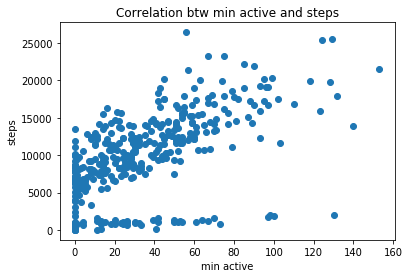

In [27]:
plt.scatter(fitbit["Minutes Very Active"], fitbit["Steps"])
plt.title("Correlation btw min active and steps")
plt.xlabel("min active")
plt.ylabel("steps")
plt.show()


#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
as seen in the table above, and as is represented in the diagram, there is a slight positive correlaiton btw the variables
corr = 0 57
"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [26]:
# your code here
fitbit[["Minutes Sedentary", "Steps"]].corr(method="pearson")

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

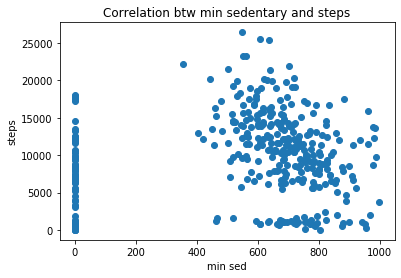

In [29]:
# your code here
plt.scatter(fitbit["Minutes Sedentary"], fitbit["Steps"])
plt.title("Correlation btw min sedentary and steps")
plt.xlabel("min sed")
plt.ylabel("steps")
plt.show()


In [ ]:
"""
No correlation - value close to 0 
graph shows random scattering of plots
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [30]:
# your code here
fitbit[["MinutesOfSleep", "Steps"]].corr(method="pearson")

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

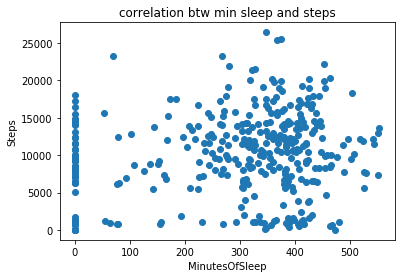

In [32]:
# your code here
plt.scatter(fitbit["MinutesOfSleep"], fitbit["Steps"])
plt.title("correlation btw min sleep and steps")
plt.xlabel("MinutesOfSleep")
plt.ylabel("Steps")
plt.show()

In [ ]:
"""
very low positive correlation, as under 0.5 not really significant
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [33]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [35]:
# your code here
fitbit_new = fitbit[columns]
corrs = fitbit_new.corr(method="pearson")
corrs

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [36]:
# your code here
corrs.sort_values("Steps", ascending= False)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [38]:
# your code here
time_grades = pd.read_csv("time_grades.csv").drop("Unnamed: 0", axis=1)
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the `time_grades` dataset.

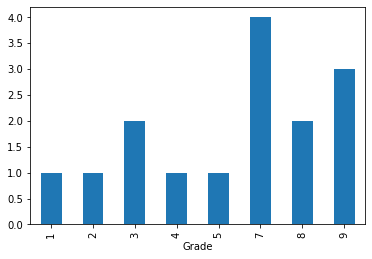

In [41]:
# your code here
# rename col name 
time_grades = time_grades.rename(columns = {"Study time":"study_time"})
time_grades.groupby("Grade").study_time.count().plot(kind="bar")

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [42]:
# your code here
time_grades.corr(method="pearson")

,study_time,Grade
study_time,1.000000,0.798046
Grade,0.798046,1.000000


In [43]:
time_grades.corr(method="spearman")

,study_time,Grade
study_time,1.000000,0.819659
Grade,0.819659,1.000000


In [ ]:
"""
high correlation for both methods of calculation
spearman corr is higher
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

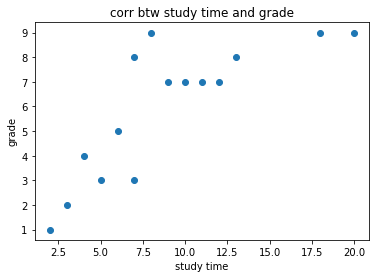

In [44]:
# your code here
plt.scatter(time_grades["study_time"], time_grades["Grade"])
plt.title("corr btw study time and grade")
plt.xlabel("study time")
plt.ylabel("grade")
plt.show()

In [45]:
"""
graph reflects calculation results, there is a correlation - interesting as grade/time relationships are
commonly linked to the pareto principle of 80/20, and this can be seen is the graphic too

"""

'\nyour commments here\n'

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
Pearson correlation evaluates the linear relationship between two continuous variables
The Spearman correlation coefficient is based on the ranked values for each variable.
(as explained on "minitab express support")
"""